In [1]:
# Importoni bibliotekat e nevojshme
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline

Për të mësuar python shikoni [lectures.scientific-python.org](https://lectures.scientific-python.org/).

---

# Hyrje ne Analizen e Sinjalet

1. Sinjalet Periodike vs. Jo-Periodike

### Sinjale Periodike

- **Përkufizimi:**  
  Një sinjal konsiderohet periodik nëse ai përsëritet me një interval të rregullt kohor. Matematikisht një sinjal $x(t)$ është periodik nëse ekziston një interval kohor $T > 0$ (i quajtur periodë) për të cilën $x(t) = x(t + T), ~ \forall t \in \mathbf{R}$.

- **Shembuj:**  
  - **Sinusi dhe Kosinusi:**  
    Sinjalet si $x(t)=\sin(\omega t)$ dhe $x(t)=\cos(\omega t)$ janë shembuj tipike të sinjaleve periodike me periode $T = \frac{1}{\nu}=\frac{2\pi}{\omega}$.
  - Sinjalet katrore, seritë me impulse, etj., që përsëriten në mënyrë periodike.

In [2]:
def plot_signals(freq=1.0, amp=1.0, phase=0.0):
    # Krijo një vektor kohor
    t = np.linspace(0, 2*np.pi, 400)
    
    # Gjenero valën sinusoidale dhe kosinusoidale
    sine_wave = amp * np.sin(freq * t + phase)
    cosine_wave = amp * np.cos(freq * t + phase)
    
    # Krijo figura me dy nën-figura
    plt.figure(figsize=(12, 5))
    
    # Plotimi i valës sinusoidale
    plt.subplot(1, 2, 1)
    plt.plot(t, sine_wave, '-k', lw=2, label='Sinusoidale')
    plt.title('Valë Sinusoidale')
    plt.xlabel('Koha')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    
    # Plotimi i valës kosinusoidale
    plt.subplot(1, 2, 2)
    plt.plot(t, cosine_wave, '-r', lw=2, label='Kosinusoidale')
    plt.title('Valë Kosinusoidale')
    plt.xlabel('Koha')
    plt.ylabel('Amplituda')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Krijo widget-e për kontroll interaktiv të parametrave: frekuenca, amplituda dhe faza
interact(plot_signals, 
         freq=FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Frekuenca'),
         amp=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Amplituda'),
         phase=FloatSlider(min=0, max=2*np.pi, step=0.1, value=0.0, description='Faza'));


interactive(children=(FloatSlider(value=1.0, description='Frekuenca', max=10.0, min=0.1), FloatSlider(value=1.…

### Sinjale Jo-Periodike
- **Përkufizimi:**  
  Sinjali është jo-periodik kur nuk përsëritet në kohë. Pra, nuk ekziston një periodë $T$ pas të cilës sinjali fillon të përsëritet.

- **Shembuj:**  
  - **Rënie Eksponenciale:** Një sinjal që zvogëlohet eksponencialisht me kalimin e kohës.
  - **Impuls** psh. ne forme Gaussiane.
  - **Sinjal Chirp:** Një sinjal ku frekuenca rritet/zvogelohet gradualisht duke mos qenë periodik.
  - **Zhurmë Rastësore:** Zhurmat psh ne nje sinjal zanor qe kapen nga mikrofoni.

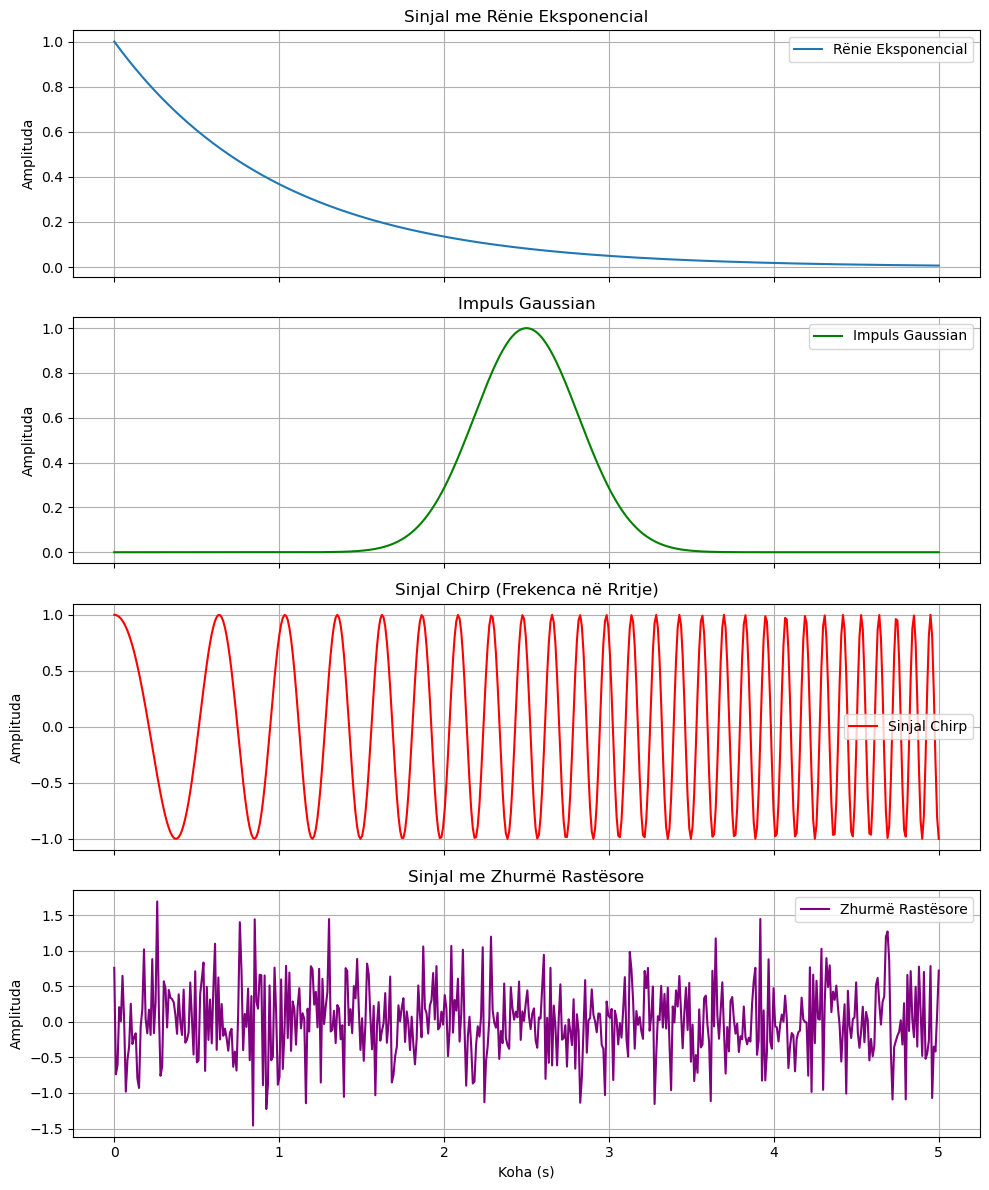

In [3]:
def plot_nonperiodic_signals():
    # Krijimi i një vektori kohor nga 0 deri në 5 sekonda me 500 pikë
    t = np.linspace(0, 5, 500)
    
    # 1. Sinjal me zvogëlim eksponencial (një sinjal jo-periodik)
    exp_decay = np.exp(-t)
    
    # 2. Impuls gaussian, i vendosur rreth t=2.5, me një shpërndarje të ngushtë
    gauss_pulse = np.exp(-((t - 2.5) ** 2) / 0.2)
    
    # 3. Sinjal chirp: frekuenca rritet gradualisht nga 1 Hz deri në 10 Hz
    chirp_signal = signal.chirp(t, f0=1, f1=10, t1=t[-1], method='linear')
    
    # 4. Sinjal me zhurmë rastësore (normalisht shpërndarë)
    noise = np.random.normal(0, 0.5, len(t))
    
    # Krijimi i figurës dhe nën-figurave për çdo sinjal
    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    
    # Grafiku i sinjalit me rënie eksponencial
    axs[0].plot(t, exp_decay, label='Rënie Eksponencial')
    axs[0].set_title('Sinjal me Rënie Eksponencial')
    axs[0].set_ylabel('Amplituda')
    axs[0].legend()
    axs[0].grid(True)
    
    # Grafiku i impulsit gaussian
    axs[1].plot(t, gauss_pulse, label='Impuls Gaussian', color='green')
    axs[1].set_title('Impuls Gaussian')
    axs[1].set_ylabel('Amplituda')
    axs[1].legend()
    axs[1].grid(True)
    
    # Grafiku i sinjalit chirp
    axs[2].plot(t, chirp_signal, label='Sinjal Chirp', color='red')
    axs[2].set_title('Sinjal Chirp (Frekenca në Rritje)')
    axs[2].set_ylabel('Amplituda')
    axs[2].legend()
    axs[2].grid(True)
    
    # Grafiku i sinjalit me zhurmë rastësore
    axs[3].plot(t, noise, label='Zhurmë Rastësore', color='purple')
    axs[3].set_title('Sinjal me Zhurmë Rastësore')
    axs[3].set_xlabel('Koha (s)')
    axs[3].set_ylabel('Amplituda')
    axs[3].legend()
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

# Thirrja e funksionit për të vizualizuar sinjalet jo-periodike
plot_nonperiodic_signals()


## 2. Sinjalet Harmonike vs. Jo-harmonike

### Sinjale Harmonike
- **Përkufizimi:**  
  Sinjali harmonik jipet nga.
$$ x(t) = A\,\sin(\omega\,t + \phi) $$

Sinjalet periodike mund të shprehen si një shumë (seri) sinjalesh harmonike.

- **Shembull:**
  - Një valë katrore, që në dukje nuk ngjan fare me një sinusoide, është në fakt një shumë infinite harmonikash që jipen nga seria:

$$ \text{Vala katrore}~~~ x(t) = \frac{4}{\pi}\sum\limits_{k=0}^{\infty}\frac{\sin\left[(2k+1)\,t\right]}{2k+1}$$

In [4]:
def square_wave_fourier_with_harmonic(n_harmonics=1):
    """
    Përafrimi i valës katrore duke përdorur serinë Fourier me numrin e harmonikave të zgjedhura.
    Në grafikun e poshtë shfaqet edhe harmonika aktuale që po shtohet.
    """
    # Krijo një vektor kohor nga -2π deri në 2π
    t = np.linspace(-2*np.pi, 2*np.pi, 1000)
    cumulative_wave = np.zeros_like(t)
    
    # Shto për secilin harmonik tek në formën: 1, 3, 5, ... 
    for k in range(n_harmonics):
        harmonic = 2*k + 1  # harmonika tek
        cumulative_wave += (4/np.pi) * (1/harmonic) * np.sin(harmonic * t)
    
    # Për harmonikën aktuale që po shtohet:
    current_harmonic = 2*(n_harmonics - 1) + 1
    current_wave = (4/np.pi) * (1/current_harmonic) * np.sin(current_harmonic * t)
    
    # Përpilojmë shprehjen funksionale në LaTeX për harmonikën aktuale
    latex_expr = rf"$\frac{{4}}{{{current_harmonic}\,\pi}} \; \sin({current_harmonic}\,t)$"
    
    # Krijo dy nën-grafike për vizualizim
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    # Grafiku i rezultatit kumulativ
    axs[0].plot(t, cumulative_wave, label=f'{n_harmonics} harmonika')
    axs[0].set_title('Përafrimi i Valës Katrore (Kumulative)')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('Amplituda')
    axs[0].legend(loc=1)
    axs[0].grid(True)
    
    # Grafiku i harmonikës aktuale me amplitudën e saktë dhe legjendën me LaTeX
    axs[1].plot(t, current_wave, label=f'Harmonika aktuale: {latex_expr}', color='red')
    axs[1].set_title('Harmonika Aktuale e Shtuar')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('Amplituda')
    axs[1].legend(loc=1)
    axs[1].grid(True)
    axs[1].set_ylim(-1.4, 1.4)
    
    plt.tight_layout()
    plt.show()

# Krijo një widget për të kontrolluar numrin e harmonikave interaktivisht
interact(square_wave_fourier_with_harmonic, 
         n_harmonics=IntSlider(min=1, max=25, step=1, value=1, description='Harmonika'));


interactive(children=(IntSlider(value=1, description='Harmonika', max=25, min=1), Output()), _dom_classes=('wi…


**Amplitude Modulation (AM):**
  - **Sinjali modulues:** Përdor formulën $1 + m \cos(2\pi f_m t)$, ku $m$ është indeksi i modulimit.
  - **Sinjali mbajtës:** Është një valë kosinusoidale me frekuencë $f_c$.
  - **Sinjali AM:** Rezulton nga shumëzimi i sinjalit modulues me sinjalin mbartës, duke prodhuar një valë me amplitudë që varion në kohë.

**Frequency Modulation (FM):**
  - **Sinjali FM:** Përdor formulën $\cos(2\pi f_c t + \beta \sin(2\pi f_m t))$, ku $\beta$ është indeksi i modulimit që përcakton devijimin maksimal të fazës.
  - Kjo formulë tregon se faza e valës mbartëse modulon në varësi të sinjalit modulues, duke rezultuar në një ndryshim dinamik të frekuencës.

In [5]:
# Funksioni për Amplitude Modulation (AM)
def plot_am(am_index=0.5, fc=50, fm=5, duration=0.1):
    """
    Amplitude Modulation.
    
    Parametrat:
      am_index : indeksi i modulimit (0 deri në 1)
      fc       : frekuenca e valës mbartëse (Hz)
      fm       : frekuenca e sinjalit modulues (Hz)
      duration : kohëzgjatja për të vizualizuar sinjalin (s)
    """
    # Vektori i kohës
    t = np.linspace(0, duration, 1000)
    
    # Sinjali modulues: përdoret për të ndryshuar amplitudën (shpesh në formë 1 + m*cos(2πfm t))
    modulating = 1 + am_index * np.cos(2 * np.pi * fm * t)
    
    # Sinjali mbartës: valë kosinusoidale
    carrier = np.cos(2 * np.pi * fc * t)
    
    # Sinjali i modulimit të amplitudës
    am_signal = modulating * carrier
    
    # Krijo figura me 3 nën-grafikë
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    
    # Sinjali modulues
    axs[0].plot(t, modulating, label=r"Sinjali modulues: $1 + m \cos(2\pi f_m t)$", color='blue')
    axs[0].set_title("Sinjali Modulues")
    axs[0].set_ylabel("Amplituda")
    axs[0].legend()
    axs[0].grid(True)
    
    # Sinjali mbajtës
    axs[1].plot(t, carrier, label=r"Sinjali mbartës: $\cos(2\pi f_c t)$", color='orange')
    axs[1].set_title("Sinjali Mbartës")
    axs[1].set_ylabel("Amplituda")
    axs[1].legend()
    axs[1].grid(True)
    
    # Sinjali AM (valë e modulimit)
    axs[2].plot(t, am_signal, label="Sinjali AM", color='green')
    axs[2].set_title("Sinjali i Modulimit të Amplitudës (AM)")
    axs[2].set_xlabel("Koha (s)")
    axs[2].set_ylabel("Amplituda")
    axs[2].legend()
    axs[2].grid(True)
    
    plt.tight_layout()
    plt.show()


# Widget për AM
interact(plot_am, 
         am_index=FloatSlider(min=0, max=1, step=0.05, value=0.5, description="Indeksi m"),
         fc=IntSlider(min=10, max=100, step=5, value=50, description="f_c (Hz)"),
         fm=IntSlider(min=1, max=20, step=1, value=5, description="f_m (Hz)"),
         duration=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description="Kohëzgjatja"));


interactive(children=(FloatSlider(value=0.5, description='Indeksi m', max=1.0, step=0.05), IntSlider(value=50,…

In [6]:
# Funksioni për Frequency Modulation (FM)
def plot_fm(beta=5, fc=50, fm=5, duration=0.1):
    """
    Frequency Modulation.
    
    Parametrat:
      beta     : indeksi i modulimit, që përcakton devijimin maksimal të fazës
      fc       : frekuenca e valës mbartëse (Hz)
      fm       : frekuenca e sinjalit modulues (Hz)
      duration : kohëzgjatja për të vizualizuar sinjalin (s)
    
    Sinjali FM është i formës:
      cos(2π f_c t + β sin(2π f_m t))
    """
    # Vektori i kohës
    t = np.linspace(0, duration, 1000)
    
    # Sinjali FM
    fm_signal = np.cos(2 * np.pi * fc * t + beta * np.sin(2 * np.pi * fm * t))
    
    # Vizualizim i sinjalit FM
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(t, fm_signal, label=r'$\cos(2\pi f_c t + \beta \sin(2\pi f_m t))$', color='purple')
    ax.set_title("Sinjali i Modulimit të Frekuencës (FM)")
    ax.set_xlabel("Koha (s)")
    ax.set_ylabel("Amplituda")
    ax.grid(True)
    ax.legend()
    plt.show()

# Widget për FM
interact(plot_fm, 
         beta=FloatSlider(min=0, max=10, step=0.5, value=5, description="Indeksi β"),
         fc=IntSlider(min=10, max=100, step=5, value=50, description="f_c (Hz)"),
         fm=IntSlider(min=1, max=20, step=1, value=5, description="f_m (Hz)"),
         duration=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description="Kohëzgjatja"));


interactive(children=(FloatSlider(value=5.0, description='Indeksi β', max=10.0, step=0.5), IntSlider(value=50,…



---



# Paraqitja me Numra Kompleks e një Sinjali

Paraqitja me numra kompleks e një sinjali është një mjet shumë i fuqishëm që na lejon të analizojmë dhe manipulojmë sinjalet sinusoidale në mënyrë më efikase duke përdorur analizën komplekse. Ky koncept është thelbësor në shumë fusha, sidomos në përpunimin e sinjaleve dhe analizën në domenin e frekuencës.

---

## 1. Formula e Euler-it dhe Ekponentët Kompleksë

**Formula e Euler-it** është themelore:

$$
e^{j\theta} = \cos(\theta) + j\sin(\theta)
$$

ku: $j$ është njësia imagjinare ($j^2 = -1$), $\theta$ është një kënd real. Kjo formulë na tregon se çdo valë sinusoidale mund të përfaqësohet si pjesa reale (ose imagjinare) e një eksponenti kompleks.


## 2. Përfaqësimi i një Sinjali Sinusoidale

Një sinjal sinusoidale i thjeshtë mund të shkruhet në formën:
$$
x(t) = A \cos(\omega t + \phi)
$$

Duke përdorur formulën e Euler-it, ky sinjal mund të shprehet edhe si pjesa reale e një eksponenti kompleks:

$$
x(t) = \Re\{ A e^{j(\omega t + \phi)} \}
$$

Alternativisht, mund të shprehemi duke përdorur **faktorin fazor**:

$$
X = A e^{j\phi}
$$

Dhe kështu:

$$
x(t) = \Re\{ X e^{j\omega t} \}
$$

Këtu, $A$ është amplituda, $\omega$ është frekuenca këndore (ku $\omega = 2\pi f$ me $f$ si frekuenca në Hertz), $\phi$ është faza fillestare, $X$ (fazori) përfshin informacionin për amplitudën dhe fazën.


## 3. Përfitimet e Paraqitjes Komplekse

### a. Thjeshtëzimi i Llogaritjeve
- **Diferencimi dhe Integrimi:**  
  Shprehja $e^{j\omega t}$ është shumë e lehtë për t'u diferencuar ose integruar, sepse këto operacione thjesht sjellin shumëzim ose pjesëtim me $j\omega$.

- **Shumëzimi, Modulimi etj:**  
  Operacionet e shumëzimit të sinjaleve bëhen më të thjeshta, duke e bërë paraqitjen komplekse të përshtatshëm për analizën e sistemeve që përfshijnë modulim, filtrim ose zhvendosje në frekuencë.

### b. Analiza në Domenin e Frekuencës
- **Transformata Fourier:**  
  Transformimi Fourier përdor eksponentë kompleksë si funksione bazë për të ndarë sinjalin në komponentët e tij të frekuencës. Kjo ndarje është thelbësore për analizën dhe përpunimin e sinjaleve.

### c. Analiza Fazore në Elektronikë
- **Analiza e Gjendjes së Qëndrueshme (Steady-State):**  
  Në analizën e qarqeve AC, përdorimi i numrave komplekse thjeshton shumë zgjidhjen e ekuacioneve diferenciale, duke i kthyer ato në ekuacione algjebrike.

---

## 4. Përmbledhje

Përfaqësimi kompleks i një sinjali jo vetëm që thjeshton llogaritjet matematike, por gjithashtu na ofron një kuptim më të thellë të sjelljes së sinjaleve në të dyja domenet kohor dhe frekuencor. Duke përfaqësuar sinjalet sinusoidale si pjesë reale e eksponentëve kompleksë, ne:

- **Integrojmë** informacionin e amplitudës dhe të fazës në një shprehje të vetme.
- **Thjeshtëzojmë** operacionet matematike si diferencimi, integrimi dhe konvolucioni.
- **Krijojmë** një urë lidhëse me analizën në domenin e frekuencës përmes transformave Fourier, të cilat janë themelore në inxhinierinë moderne të sinjaleve dhe komunikimeve.

Ky mjet është themelor për të kuptuar se si sinjalet ndërveprojnë në sistemet elektronike dhe është baza për shumë teknika të avancuara në përpunimin e sinjaleve dhe analizën e qarqeve.





# Hyrje në Seritë dhe Transformimet Fourier

Në fushën e përpunimit të sinjaleve, seritë dhe transformimet Fourier janë themelore për analizimin e sinjaleve si një shumë harmonikash.


## 1. Seritë Fourier

Seritë Fourier ofrojnë një metodë për të përshkruar sinjalet periodike si një shumë e pafundme e sinjaleve harmonike (sinusoidale). Për një sinjal periodik $x(t)$ me periodë $T$, zbërthimi i tij në seri Fourier është:

$$
x(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n}{T} t\right) + b_n \sin\left(\frac{2\pi n}{T} t\right) \right]
$$

ku: $a_0$ është komponenti DC (vlera mesatare e sinjalit), $a_n$ dhe $b_n$ janë koeficientët që përcaktojnë kontributin e harmonikave të ndryshme. Kjo paraqitje lejon analizën dhe sintezën e sinjaleve periodike duke ndarë sinjalin në komponente harmonike me frekuenca shumëfisha të një frekuence themelore.


## 2. Zbërthimi Fourier

Zbërthimi Fourier është një formë më e përgjithshme e serisë Fourier, i cili përdoret për të përshkruar sinjalet jo domosdoshmërisht periodike. Ideja themelore është që, edhe sinjalet jo-periodike mund të përshkruhen si një shumë e pafundme e funksioneve harmonike, nëse e konsiderojmë sinjalin të kufizuar në një interval të madh kohor dhe më pas zgjerojmë intervalin në të pafundme.

Në këtë rast, koeficientët $a_n$ dhe $b_n$ llogariten duke përdorur integrale të përshtatshme në intervalin përkatës, dhe shprehja merr formën:

$$
x(t) = \frac{a_0}{2} + \sum\limits_{n=1}^{\infty} \left[ a_n \cos(n\omega_0 t) + b_n \sin(n\omega_0 t) \right]
$$

ku $\omega_0 = \frac{2\pi}{T}$ është frekuenca themelore. Zbërthimi Fourier është baza për shumë teknika në analizën e sinjaleve, pasi lejon përfaqësimin e një game të gjerë sinjalësh harmonike.


## 3. Transformimet Fourier

Transformimet Fourier zgjeron konceptin e serive Fourier për sinjalet jo-periodike dhe e transformon një sinjal nga domeni kohor në domenin e frekuencës. Për një sinjal $x(t)$, e transformuara Fourier $X(f)$ jipet nga:

$$
X(f) = \int\limits_{-\infty}^{\infty} x(t) \, e^{-j 2\pi f t} \, dt
$$

Transfimi Fourier ofron disa përparësi:
- **Analizë e Frekuencës:** Na lejon të shohim se cilat komponentë frekuencorë kontribuojnë në përbërjen e sinjalit.
- **Thjeshtëzimi i Operacioneve:** Operacione të tilla si filtrimi, konvolucioni dhe manipulimi i sinjaleve bëhen më të thjeshta në domenin e frekuencës.

Në anën tjetër, transformata inverse Fourier rikthen sinjalin origjinal:

$$
x(t) = \int\limits_{-\infty}^{\infty} X(f) \, e^{j 2\pi f t} \, df
$$

Kështu, transformata Fourier krijon një urë të fuqishme mes analizës kohore dhe asaj të frekuencave.


## Përmbledhje

- **Seritë Fourier:** Për sinjalet periodike, shprehen si shumë harmonikash me frekuenca që janë shumëfish të një frekuence themelore.
- **Zbëerthimi Fourier:** Zgjeron këtë koncept për sinjalet jo-periodike duke përdorur një shumë integrale të funksioneve sinusoidale.
- **Transformimi Fourier:** Transformon sinjalet nga domeni kohor në domenin e frekuencës, duke ofruar një analizë të thelluar të spektrit.




# Ushtrime & Praktikim

### 1. Gjenerimi dhe Analiza e Sinjaleve Periodike dhe Jo-Periodike 
##### - Eksperiment me Osciloskop:
Përdorni një gjenerator-funksioni për të gjeneruar sinjale sinusoidale, katrore dhe trekëndësh ose sharrë.
1. Shikonihohin në osciloskop ndryshimet mes sinjaleve periodike (p.sh., sinusoidale) dhe sinjaleve jo-periodike (p.sh., impulse ose zhurmë).
2. Diskutoni ndikimin e zhurmës në sinjal.

##### Simulime në Jupyter Notebook:
1. Përdorni Python (NumPy, Matplotlib dhe ipywidgets) për të gjeneruar sinjale të ndryshme dhe për të vizualizuar karakteristikat e tyre.
2. Eksperimentoni me parametrat (amplituda, frekuenca, faza) dhe analizoni ndikimin e tyre në formën e sinjalit.


### 2. Demonstrimi i Serive Fourier dhe Aproksimimit të Valëve Katrore
##### Përafrimi i Valës Katrore me Serinë Fourier:
1. Modifikono numrin e harmonikave në një Jupyter Notebook për të parë se si një valë katrore përafrohet nga një shumë sinjalesh sinusoidalë.
2. Diskutoni fenomenin e ["Gibbs"](https://en.wikipedia.org/wiki/Gibbs_phenomenon) dhe pse përafrimi bëhet më i saktë me shtimin e harmonikave.

##### Eksperiment me Software Simulimi:
1. Përdorni mjete simulimi (p.sh., MATLAB ose Python) për të shfaqur spektrin të një sinjali periodik.
2. Shpjegoni se si koeficientët $a_n$ dhe $b_n$ në serinë Fourier përfaqësojnë amplituden e sinjalit në hapësirën e frekuencave.


### 3. Demonstrime të Transformës Fourier
##### Analiza e Spektrit në Kohë Reale:
1. Përdorni një osciloskop me funksion "spectrum analyzer" për të regjistruar sinjalin nga një gjenerator-funksioni dhe për të shfaqur spektrin në frekuencë.
2. Diskutoni lidhjen midis përbërjes kohore dhe përbërjes së frekuencave të sinjalit.

##### Simulime me Python:
1. Gjeneroni një sinjal kompleks në kohë dhe përdorni funksionet e Fast Fourier Transform (FFT) për të nxjerrë spektrin.
2. Vizualizoni se si ndryshimet në sinjal (p.sh., shtimi i një komponenti të ri) ndikon në spektrin e tij (te frekuencave).

